# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

## Familiarize youself with the data

In [2]:
df_flights.shape

(271940, 20)

In [3]:
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [4]:
df_flights.tail()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0
271939,2013,6,11,2,UA,14771,San Francisco International,San Francisco,CA,14100,Philadelphia International,Philadelphia,PA,1338,60,1.0,2200,40,1,0


In [5]:
df_flights.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
Carrier               object
OriginAirportID        int64
OriginAirportName     object
OriginCity            object
OriginState           object
DestAirportID          int64
DestAirportName       object
DestCity              object
DestState             object
CRSDepTime             int64
DepDelay               int64
DepDel15             float64
CRSArrTime             int64
ArrDelay               int64
ArrDel15               int64
Cancelled              int64
dtype: object

In [6]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,269179.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.201134,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.400849,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


## Cleaning

### Cleaning Missing Values

In [7]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [8]:
df_flights['DepDel15'].value_counts()

0.0    215038
1.0     54141
Name: DepDel15, dtype: int64

Since DepDel15 depends on DepDelay, let's see if we can impute missing values based on the values in DepDelay. If DepDelay is 15 minutes or more, then DepDelay15 is True (1).

In [9]:
df_flights[df_flights.isnull().any(axis=1)][['DepDelay','DepDel15']]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


It seems like most of the NaN should be 0, meaning the flight is not delayed. But let's confirm this theory by examining the rest of the rows.

In [10]:
df_flights[df_flights.isnull().any(axis=1)][['DepDelay','DepDel15']].describe()

,DepDelay,DepDel15
count,2761.0,0.0
mean,0.0,NaN
std,0.0,NaN
min,0.0,NaN
25%,0.0,NaN
50%,0.0,NaN
75%,0.0,NaN
max,0.0,NaN


Since all the values are 0 in DepDelay, we can fill the missing values of DepDel15 by 0.

In [11]:
df_flights['DepDel15'] = df_flights.DepDel15.fillna(0)

In [12]:
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

There are no more missing values in the dataframe.

In [13]:
df_flights[['DepDelay', 'ArrDelay']].describe()

,DepDelay,ArrDelay
count,271940.000000,271940.000000
mean,10.350449,6.496650
std,35.673710,38.230331
min,-63.000000,-75.000000
25%,-4.000000,-11.000000
50%,-1.000000,-3.000000
75%,9.000000,10.000000
max,1425.000000,1440.000000


### Cleaning Outliers

In [14]:
# Function to show summary stats and distribution for a column
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(var_data.name,'\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(var_data.name)

    # Show the figure
    fig.show()

DepDelay 
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00

ArrDelay 
Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



<ipython-input-14-050549b4b3a0>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-14-050549b4b3a0>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


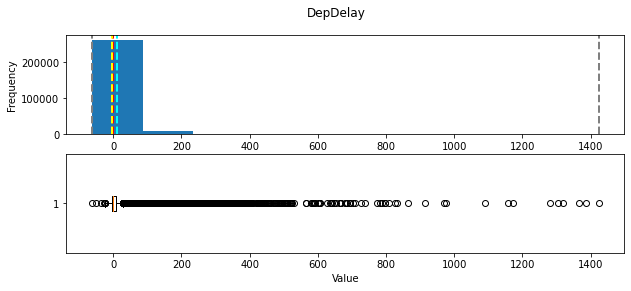

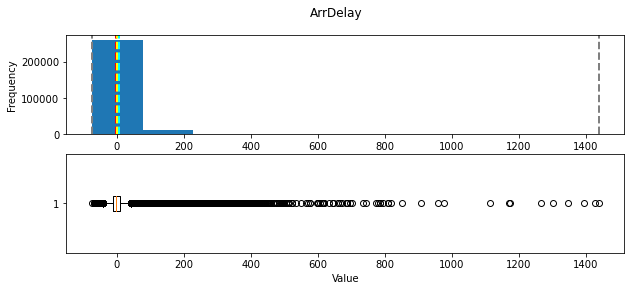

In [15]:
# Call the function for each delay field
delayCols = ['DepDelay','ArrDelay']
for col in delayCols:
    show_distribution(df_flights[col])

Outliers are concentrated in the upper percentiles. Let's try to remove them by only keeping the data between 1% and 90%.

In [16]:
# Find and remove outliers in DepDelay
depDelay_quant01 = df_flights.DepDelay.quantile(0.01)
depDelay_quant90 = df_flights.DepDelay.quantile(0.90)
df_flights = df_flights[df_flights.DepDelay < depDelay_quant90]
df_flights = df_flights[df_flights.DepDelay > depDelay_quant01]

# Find and remove outliers in ArrDelay
arrDelay_quant01 = df_flights.ArrDelay.quantile(0.01)
arrDelay_quant90 = df_flights.ArrDelay.quantile(0.90)
df_flights = df_flights[df_flights.ArrDelay < arrDelay_quant90]
df_flights = df_flights[df_flights.ArrDelay > arrDelay_quant01]

DepDelay 
Minimum:-11.00
Mean:-0.13
Median:-2.00
Mode:-3.00
Maximum:36.00

ArrDelay 
Minimum:-32.00
Mean:-5.68
Median:-6.00
Mode:0.00
Maximum:16.00



<ipython-input-14-050549b4b3a0>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-14-050549b4b3a0>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


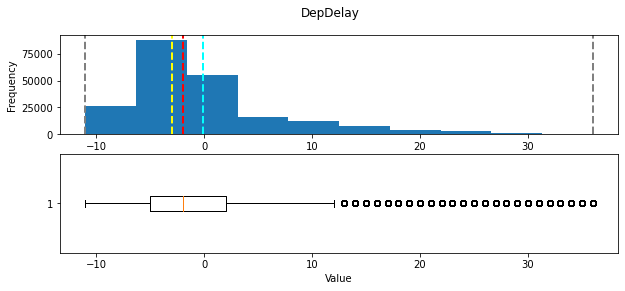

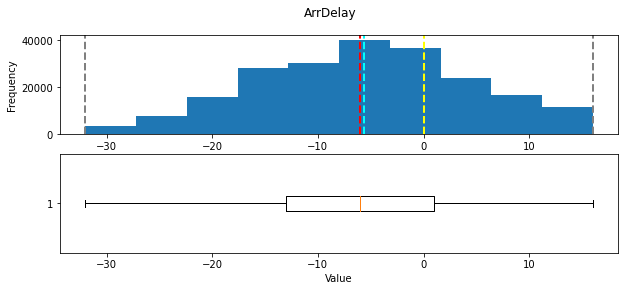

In [17]:
for col in delayCols:
    show_distribution(df_flights[col])

The DepDelay column shows a right-skewed distribution.
The ArrDelay column shows an almost normal distributin.

## Exploration

### What are the average (mean) departure and arrival delays?


In [18]:
mean_dep_delay = df_flights['DepDelay'].mean()
mean_arr_delay = df_flights['ArrDelay'].mean()

print('Mean Departure Delays: "%.2f" ' % mean_dep_delay)
print('Mean Arrival Delays: "%.2f" ' % mean_arr_delay)

Mean Departure Delays: "-0.13" 
Mean Arrival Delays: "-5.68" 


### How do the carriers compare in terms of arrival delay performance?

In [19]:
carriers_delays = df_flights.groupby('Carrier')[['DepDelay', 'ArrDelay']].mean()

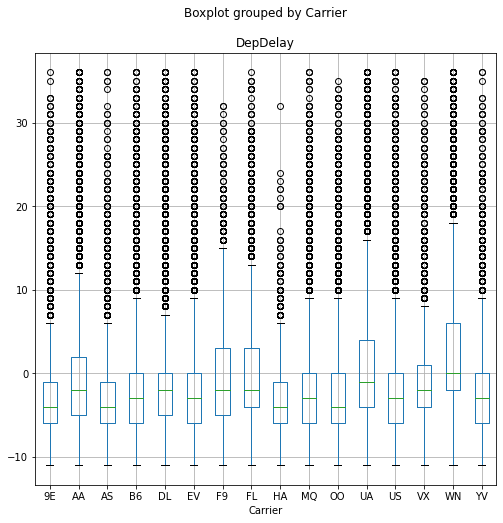

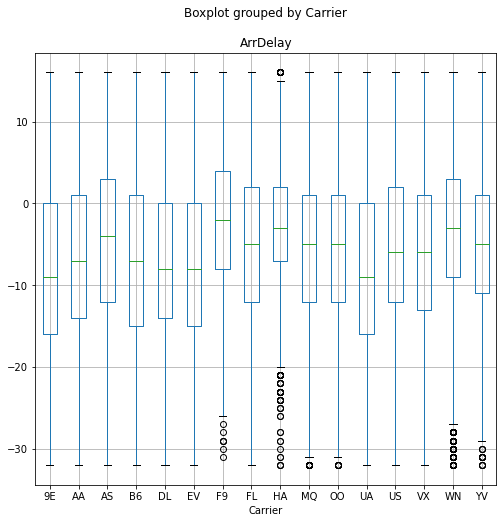

In [20]:
for col in delayCols:
    df_flights.boxplot(column=col, by='Carrier', figsize=(8,8))

### Is there a noticable difference in arrival delays for different days of the week?

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DayOfWeek'>

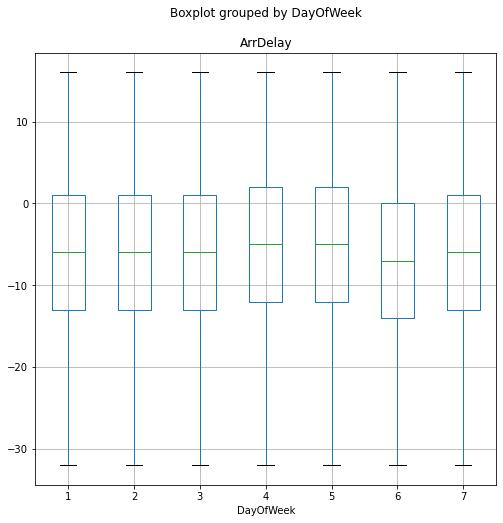

In [21]:
df_flights.boxplot(column='ArrDelay', by='DayOfWeek', figsize=(8,8))


### Which departure airport has the highest average departure delay?

In [22]:
Origin_airport_DepDelay = df_flights.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False)
Origin_airport_DepDelay

OriginAirportName
Chicago Midway International                            3.865294
Dallas Love Field                                       3.039141
William P Hobby                                         2.706247
Denver International                                    1.863804
Baltimore/Washington International Thurgood Marshall    1.805401
                                                          ...   
Tucson International                                   -2.522114
Richmond International                                 -2.665944
Ted Stevens Anchorage International                    -2.886700
Kahului Airport                                        -2.905252
Long Beach Airport                                     -3.349229
Name: DepDelay, Length: 70, dtype: float64

<AxesSubplot:xlabel='OriginAirportName'>

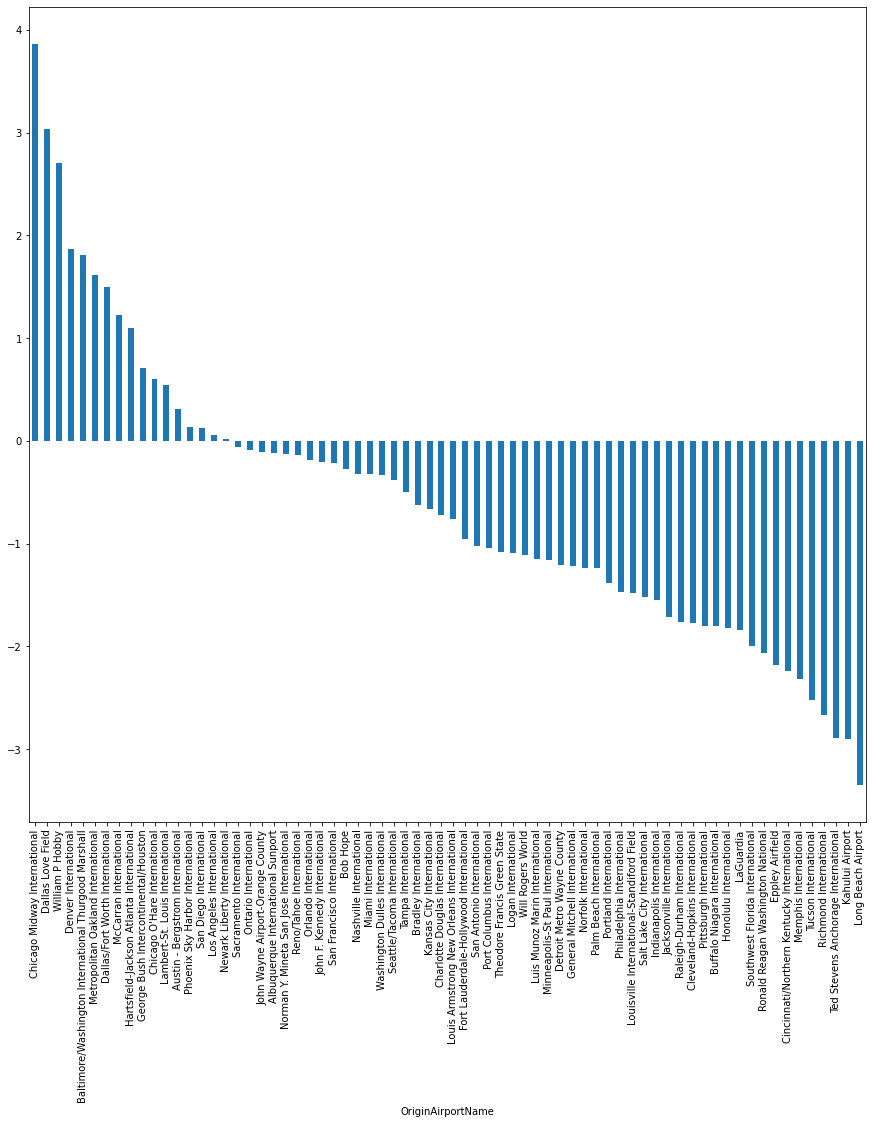

In [23]:
Origin_airport_DepDelay.plot(kind='bar', figsize=(15,15))

### Do late departures tend to result in longer arrival delays than on-time departures?

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DepDel15'>

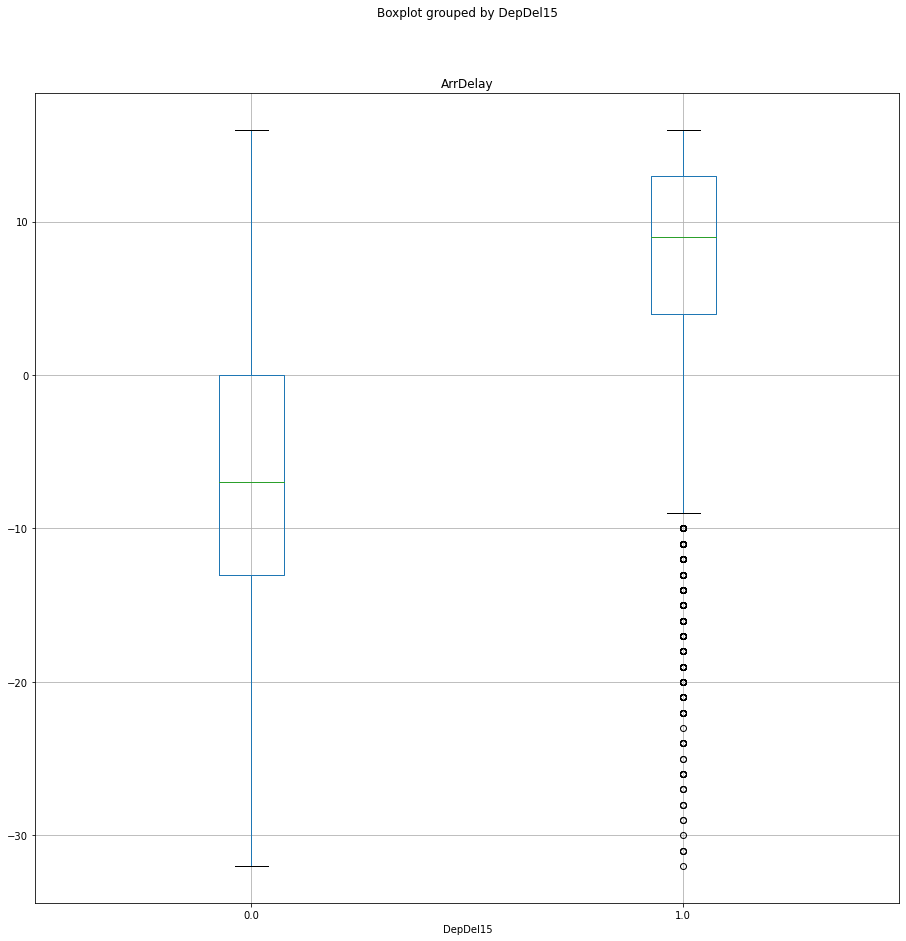

In [24]:
df_flights.boxplot(column='ArrDelay', by='DepDel15', figsize=(15,15))


### Which route (from origin airport to destination airport) has the most late arrivals?

In [25]:
# Add a routes column
routes  = pd.Series(df_flights['OriginAirportName'] + ' > ' + df_flights['DestAirportName'])
df_flights = pd.concat([df_flights, routes.rename("Route")], axis=1)

# Group by routes
route_group = df_flights.groupby(df_flights.Route)
pd.DataFrame(route_group['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)

,ArrDel15
Route,
San Francisco International > Los Angeles International,67
Los Angeles International > San Francisco International,42
Detroit Metro Wayne County > Chicago O'Hare International,29
LaGuardia > Logan International,29
LaGuardia > Chicago O'Hare International,27
...,...
Norman Y. Mineta San Jose International > Honolulu International,0
Norman Y. Mineta San Jose International > Hartsfield-Jackson Atlanta International,0
Norman Y. Mineta San Jose International > George Bush Intercontinental/Houston,0


In [26]:
# df_flights['route'] = df_flights['OriginAirportName'] + '-' + df_flights['DestAirportName']
# df_flights.groupby('route')['ArrDel15'].sum().sort_values(ascending = False)

### Which route has the highest average arrival delay?

In [27]:
pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

,ArrDelay
Route,
Theodore Francis Green State > Southwest Florida International,12.000000
Charlotte Douglas International > General Mitchell International,10.000000
Indianapolis International > Philadelphia International,10.000000
Port Columbus International > Logan International,7.000000
Cleveland-Hopkins International > Philadelphia International,7.000000
...,...
Lambert-St. Louis International > Cleveland-Hopkins International,-20.000000
Jacksonville International > Chicago Midway International,-20.000000
Eppley Airfield > LaGuardia,-20.750000


In [28]:
# df_flights.groupby('route')['ArrDelay'].mean().sort_values(ascending = False)